In [239]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [240]:
#uploaded the data set
data=pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [241]:
data.shape

(614, 13)

In [242]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#after describe we can see there is much difference in std and mean,and data varation between quantile range is also large,so
#we can predict that their are outliers and data is not normalised(bell-shape)

In [243]:
data.isna().sum()#we have detected no. of Nan present in data

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [244]:
data=data.drop(['Loan_ID','Gender'],1)  
 #since login_id is unique no. and gender donot effect much in taking loan so both the features has been droped


In [245]:
data=pd.get_dummies(data=data,columns=['Married','Education','Self_Employed','Property_Area','Loan_Status'],drop_first=True)
data
#get dummies has been used to convert all the string and other format data into numbers

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,NaN,360.0,1.0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,1
610,3+,4106,0.0,40.0,180.0,1.0,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,0,0,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,1,0,0,0,1,1


In [246]:
data.isna().sum()

Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Married_Yes                 0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               599 non-null    object 
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               592 non-null    float64
 4   Loan_Amount_Term         600 non-null    float64
 5   Credit_History           564 non-null    float64
 6   Married_Yes              614 non-null    uint8  
 7   Education_Not Graduate   614 non-null    uint8  
 8   Self_Employed_Yes        614 non-null    uint8  
 9   Property_Area_Semiurban  614 non-null    uint8  
 10  Property_Area_Urban      614 non-null    uint8  
 11  Loan_Status_Y            614 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(6)
memory usage: 32.5+ KB


In [248]:
#all Nan has been filled
data['Dependents']=data['Dependents'].fillna(0)
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [249]:
data.isna().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [250]:
#replace 3+ with 4 because + is non numeric
data['Dependents']=data['Dependents'].replace('3+',4)

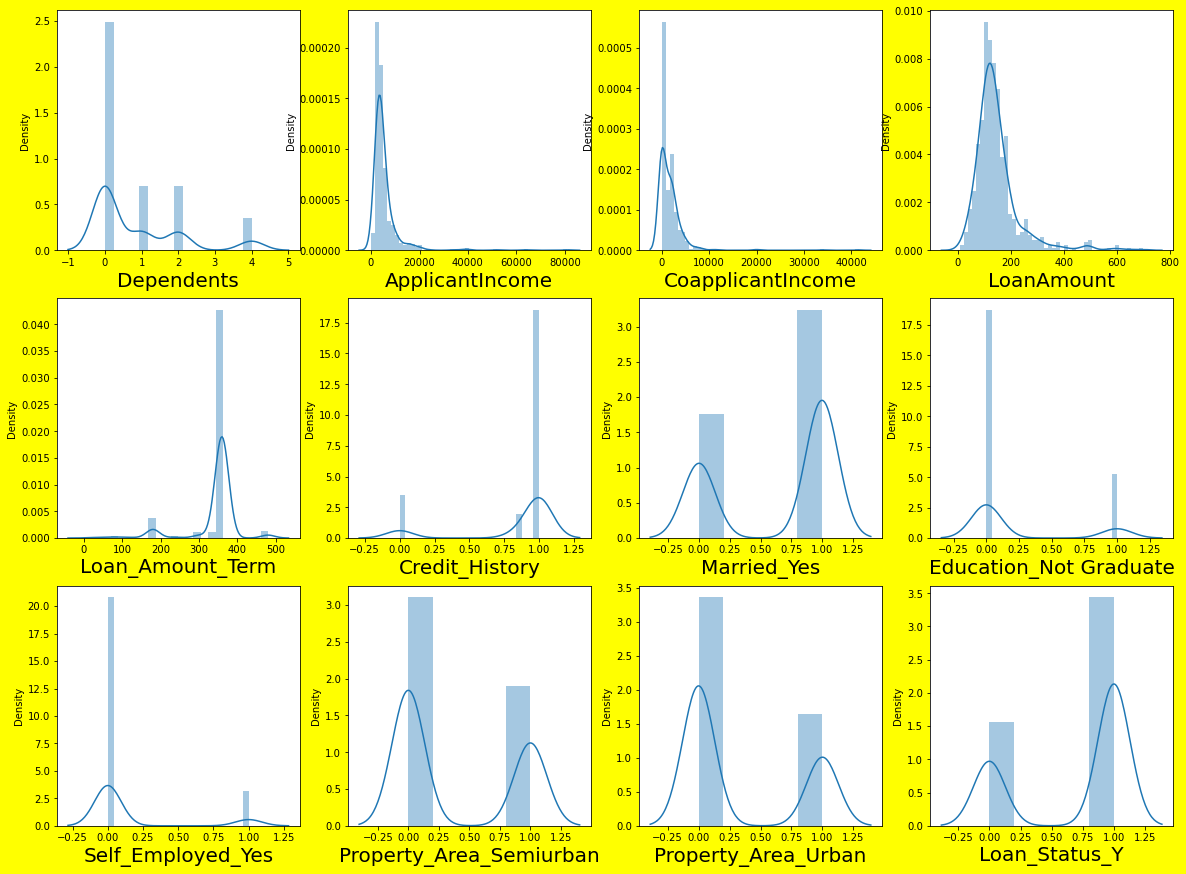

In [251]:
#plot distplot to check the data is normalised or not but only for continues features,so only applicantincome coapplicantincome andloan amount has been considered 
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [252]:
data['ApplicantIncome']=data['ApplicantIncome'].replace(0,data['ApplicantIncome'].mean())
data['CoapplicantIncome']=data['CoapplicantIncome'].replace(0,data['CoapplicantIncome'].mean())
data['LoanAmount']=data['LoanAmount'].replace(0,data['LoanAmount'].mean())


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

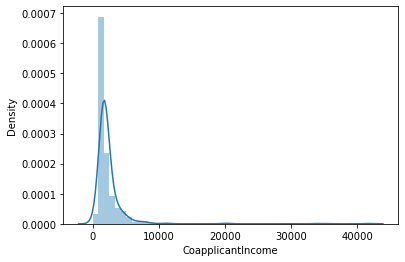

In [253]:
sns.distplot(data['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

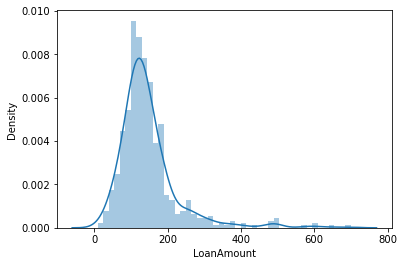

In [254]:
sns.distplot(data['LoanAmount'])

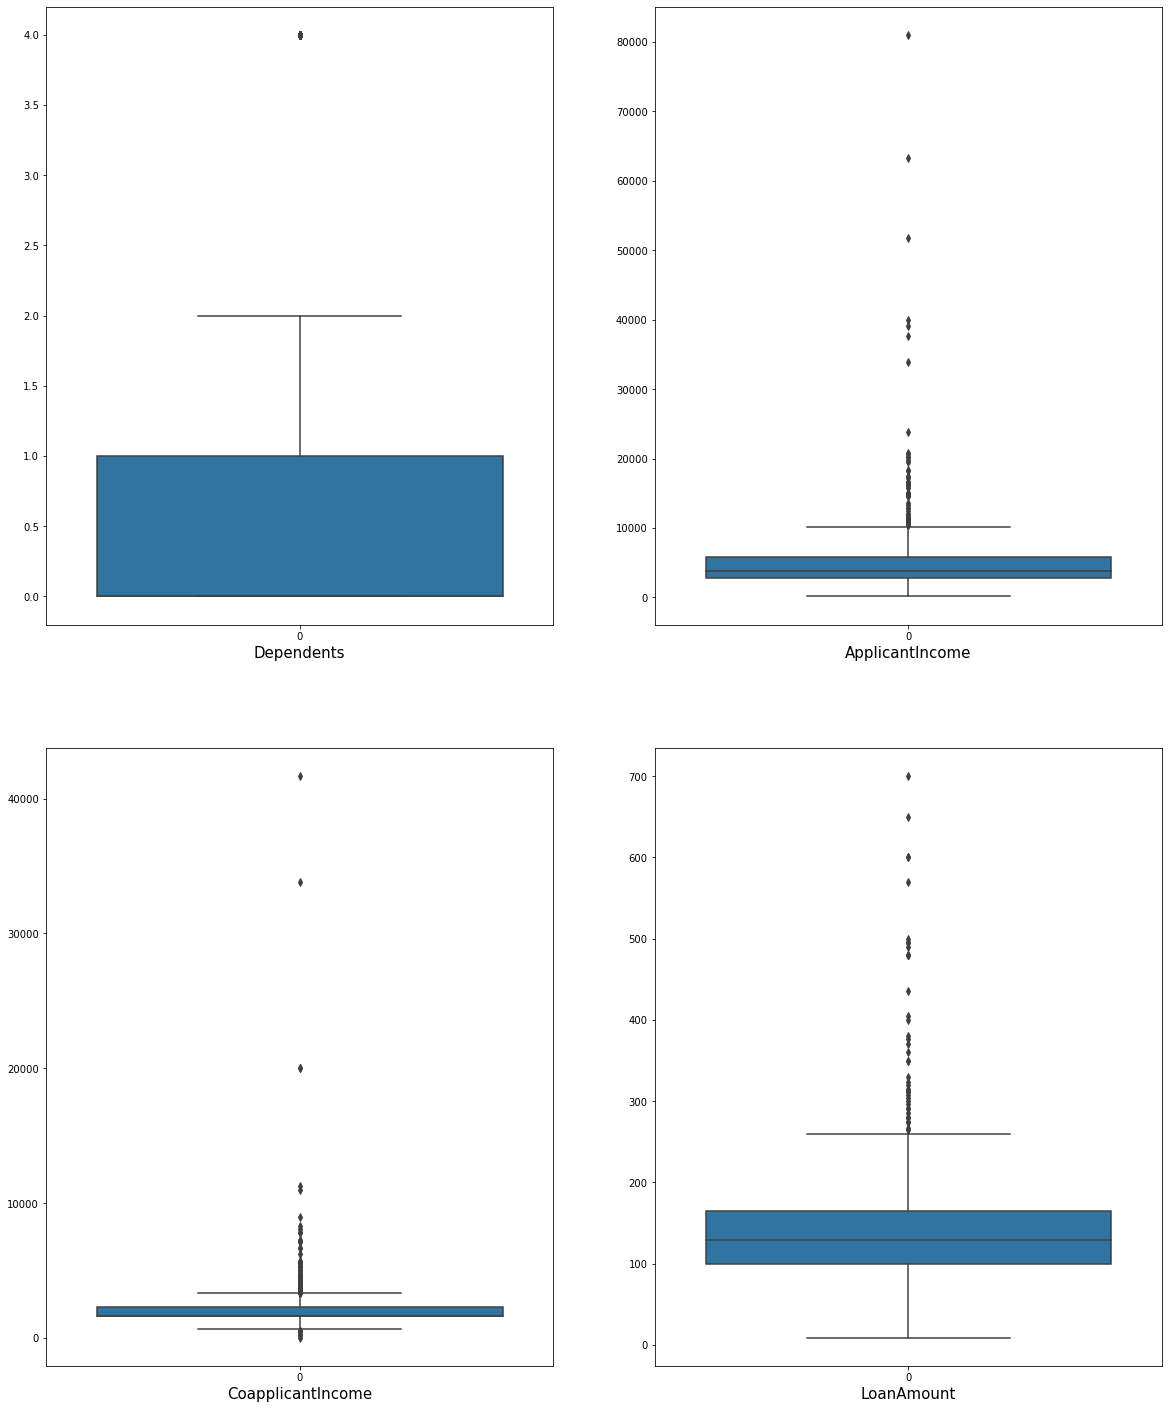

In [255]:
#boxplot has been ploted to detect the outliers
plt.figure(figsize=(20,25))
plotnumber=1
for column in data:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()


In [256]:
#inter quantile range
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [257]:
ai=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
ai

10171.25

In [258]:
index=np.where(data['ApplicantIncome']>ai)
index

(array([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
        146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
        324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
        487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604], dtype=int64),)

In [259]:
#drop all the outliers rows from data to remove the skewness from the data
data=data.drop(data.index[index])
data.shape

(564, 12)

In [260]:
#reset so that index can be reset
data.reset_index()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,0,5849,1621.245798,146.412162,360.0,1.0,0,0,0,0,1,1
1,1,1,4583,1508.000000,128.000000,360.0,1.0,1,0,0,0,0,0
2,2,0,3000,1621.245798,66.000000,360.0,1.0,1,0,1,0,1,1
3,3,0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0,1,1
4,4,0,6000,1621.245798,141.000000,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,609,0,2900,1621.245798,71.000000,360.0,1.0,0,0,0,0,0,1
560,610,4,4106,1621.245798,40.000000,180.0,1.0,1,0,0,0,0,1
561,611,1,8072,240.000000,253.000000,360.0,1.0,1,0,0,0,1,1
562,612,2,7583,1621.245798,187.000000,360.0,1.0,1,0,0,0,1,1


In [261]:
cai=(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
cai

3311.2563029593484

In [262]:
index=np.where(data['CoapplicantIncome']>cai)
index

(array([  5,  11,  18,  20,  29,  36,  46,  57,  59,  62,  72,  74,  85,
         87,  95,  97,  98, 102, 106, 114, 124, 126, 132, 137, 144, 152,
        157, 161, 164, 165, 170, 177, 220, 222, 224, 225, 230, 233, 238,
        243, 269, 298, 307, 309, 320, 321, 323, 333, 342, 346, 351, 372,
        386, 393, 406, 409, 425, 438, 458, 459, 461, 462, 464, 470, 471,
        472, 480, 486, 490, 508, 533, 542, 551, 554, 555], dtype=int64),)

In [263]:
data=data.drop(data.index[index])
data.shape

(489, 12)

In [264]:
data.reset_index()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,0,5849,1621.245798,146.412162,360.0,1.0,0,0,0,0,1,1
1,1,1,4583,1508.000000,128.000000,360.0,1.0,1,0,0,0,0,0
2,2,0,3000,1621.245798,66.000000,360.0,1.0,1,0,1,0,1,1
3,3,0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0,1,1
4,4,0,6000,1621.245798,141.000000,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,609,0,2900,1621.245798,71.000000,360.0,1.0,0,0,0,0,0,1
485,610,4,4106,1621.245798,40.000000,180.0,1.0,1,0,0,0,0,1
486,611,1,8072,240.000000,253.000000,360.0,1.0,1,0,0,0,1,1
487,612,2,7583,1621.245798,187.000000,360.0,1.0,1,0,0,0,1,1


In [265]:
la=(q3.LoanAmount+(1.5*iqr.LoanAmount))
la

261.5

In [266]:
index=np.where(data['LoanAmount']>la)
index

(array([ 67, 121, 181, 310, 472], dtype=int64),)

In [267]:
data=data.drop(data.index[index])
data.shape

(484, 12)

In [268]:
data.reset_index()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,0,5849,1621.245798,146.412162,360.0,1.0,0,0,0,0,1,1
1,1,1,4583,1508.000000,128.000000,360.0,1.0,1,0,0,0,0,0
2,2,0,3000,1621.245798,66.000000,360.0,1.0,1,0,1,0,1,1
3,3,0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0,1,1
4,4,0,6000,1621.245798,141.000000,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,609,0,2900,1621.245798,71.000000,360.0,1.0,0,0,0,0,0,1
480,610,4,4106,1621.245798,40.000000,180.0,1.0,1,0,0,0,0,1
481,611,1,8072,240.000000,253.000000,360.0,1.0,1,0,0,0,1,1
482,612,2,7583,1621.245798,187.000000,360.0,1.0,1,0,0,0,1,1


In [269]:
cai=(q1.CoapplicantIncome-(1.5*iqr.CoapplicantIncome))
cai

607.2394950677526

In [270]:
index=np.where(data['CoapplicantIncome']<cai)
index

(array([251, 276, 310, 338, 419, 440, 453, 481], dtype=int64),)

In [271]:
data=data.drop(data.index[index])
data.shape

(476, 12)

In [272]:
data.reset_index()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,0,5849,1621.245798,146.412162,360.0,1.0,0,0,0,0,1,1
1,1,1,4583,1508.000000,128.000000,360.0,1.0,1,0,0,0,0,0
2,2,0,3000,1621.245798,66.000000,360.0,1.0,1,0,1,0,1,1
3,3,0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0,1,1
4,4,0,6000,1621.245798,141.000000,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,608,0,3232,1950.000000,108.000000,360.0,1.0,1,0,0,0,0,1
472,609,0,2900,1621.245798,71.000000,360.0,1.0,0,0,0,0,0,1
473,610,4,4106,1621.245798,40.000000,180.0,1.0,1,0,0,0,0,1
474,612,2,7583,1621.245798,187.000000,360.0,1.0,1,0,0,0,1,1


In [273]:
la=(q1.LoanAmount-(1.5*iqr.LoanAmount))
la

3.5

In [274]:
index=np.where(data['LoanAmount']<la)
index

(array([], dtype=int64),)

In [275]:
data=data.drop(data.index[index])
data.shape

(476, 12)

In [276]:
data.reset_index()

,index,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,0,5849,1621.245798,146.412162,360.0,1.0,0,0,0,0,1,1
1,1,1,4583,1508.000000,128.000000,360.0,1.0,1,0,0,0,0,0
2,2,0,3000,1621.245798,66.000000,360.0,1.0,1,0,1,0,1,1
3,3,0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0,1,1
4,4,0,6000,1621.245798,141.000000,360.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,608,0,3232,1950.000000,108.000000,360.0,1.0,1,0,0,0,0,1
472,609,0,2900,1621.245798,71.000000,360.0,1.0,0,0,0,0,0,1
473,610,4,4106,1621.245798,40.000000,180.0,1.0,1,0,0,0,0,1
474,612,2,7583,1621.245798,187.000000,360.0,1.0,1,0,0,0,1,1


In [ ]:
#again data has been check now it is show some bell shaped curve,skewness has been removed 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

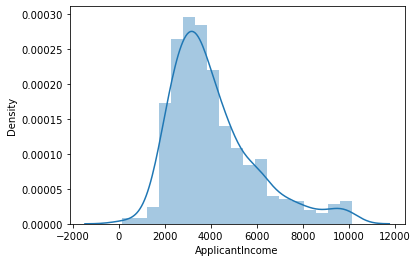

In [277]:
sns.distplot(data['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

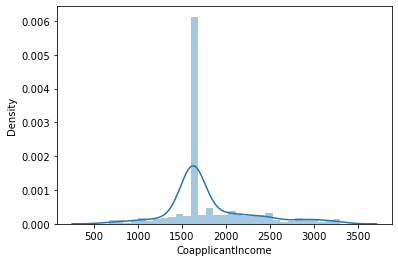

In [278]:
sns.distplot(data['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

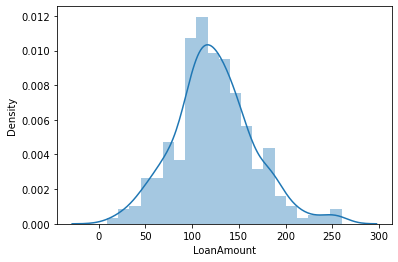

In [279]:
sns.distplot(data['LoanAmount'])

In [280]:
#standard scaler has been applied 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [281]:
#variance inflation factor has been find to multicolinearity between the features
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.151833,Dependents
1,1.582767,ApplicantIncome
2,1.116408,CoapplicantIncome
3,1.692006,LoanAmount
4,1.055796,Loan_Amount_Term
5,1.010101,Credit_History
6,1.138911,Married_Yes
7,1.066786,Education_Not Graduate
8,1.022270,Self_Employed_Yes
9,1.439394,Property_Area_Semiurban


In [282]:
#features and label has been separated 
X=data.drop(columns=['Loan_Status_Y'])
y=data['Loan_Status_Y']

In [283]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,1621.245798,146.412162,360.0,1.0,0,0,0,0,1
1,1,4583,1508.000000,128.000000,360.0,1.0,1,0,0,0,0
2,0,3000,1621.245798,66.000000,360.0,1.0,1,0,1,0,1
3,0,2583,2358.000000,120.000000,360.0,1.0,1,1,0,0,1
4,0,6000,1621.245798,141.000000,360.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
608,0,3232,1950.000000,108.000000,360.0,1.0,1,0,0,0,0
609,0,2900,1621.245798,71.000000,360.0,1.0,0,0,0,0,0
610,4,4106,1621.245798,40.000000,180.0,1.0,1,0,0,0,0
612,2,7583,1621.245798,187.000000,360.0,1.0,1,0,0,0,1


In [284]:
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
610    1
612    1
613    0
Name: Loan_Status_Y, Length: 476, dtype: uint8

In [285]:
#appling train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=41)
y_train.head()

195    0
282    1
219    1
17     0
74     1
Name: Loan_Status_Y, dtype: uint8

In [286]:
#applying logistic regression because label have categorical data and their is only two category in label either yes or no
log_reg=LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [287]:
y_pred=log_reg.predict(x_test)

In [288]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=uint8)

In [289]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [290]:
#finding accuracy 
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8739495798319328

In [291]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[22, 14],
       [ 1, 82]], dtype=int64)

In [293]:
from sklearn.metrics import classification_report

In [294]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.61      0.75        36
           1       0.85      0.99      0.92        83

    accuracy                           0.87       119
   macro avg       0.91      0.80      0.83       119
weighted avg       0.89      0.87      0.86       119



In [299]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [300]:
print('Threshold=',thresholds)
print('True Positive rate=',tpr)
print('False Positive rate=',fpr)

Threshold= [2 1 0]
True Positive rate= [0.         0.98795181 1.        ]
False Positive rate= [0.         0.38888889 1.        ]


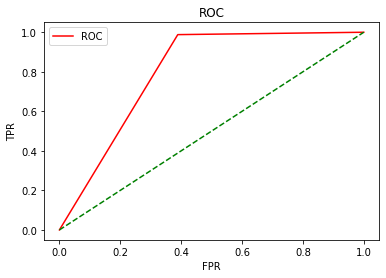

In [303]:
#ROC AND AUC CURVE
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

In [305]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.7995314591700133
